In [16]:
import numpy as np
from skimage import io
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.color import rgba2rgb

# Đường dẫn đến hình ảnh gốc và hình ảnh đã xử lý
ground_truth_path = r'dataset/groundtruth/2.png'  # Sử dụng chuỗi thô
denoised_path = r'dataset/hi/2.png'                # Sử dụng chuỗi thô

# Đọc hình ảnh
ground_truth = io.imread(ground_truth_path)
denoised = io.imread(denoised_path)

# Kiểm tra kích thước hình ảnh
print(f'Kích thước hình ảnh gốc: {ground_truth.shape}')
print(f'Kích thước hình ảnh đã xử lý: {denoised.shape}')

# Chuyển đổi hình ảnh gốc sang RGB nếu cần
if ground_truth.shape[2] == 4:  # Nếu hình ảnh gốc có 4 kênh
    ground_truth = rgba2rgb(ground_truth)  # Chuyển đổi RGBA sang RGB

# Tính PSNR
psnr_value = psnr(ground_truth, denoised, data_range=255)  # Thêm data_range

# Sử dụng win_size là 3 (nhỏ hơn hoặc bằng chiều dài tối thiểu)
ssim_value = ssim(ground_truth, denoised, multichannel=True, win_size=3, data_range=255)  # Thêm data_range

print(f'PSNR: {psnr_value} dB')
print(f'SSIM: {ssim_value}')

Kích thước hình ảnh gốc: (144, 256, 4)
Kích thước hình ảnh đã xử lý: (144, 256, 3)
PSNR: 7.706432103141291 dB
SSIM: 0.0014360262389399969


In [17]:
import os
import numpy as np
from skimage import io
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import pandas as pd

# Đường dẫn đến các thư mục chứa ảnh gốc và ảnh đã xử lý
ground_truth_path = r'dataset/groundtruth'  # Sử dụng chuỗi thô
denoised_path = r'dataset/hi'                # Sử dụng chuỗi thô

# Lấy danh sách tên ảnh
ground_truth_images = os.listdir(ground_truth_path)
denoised_images = os.listdir(denoised_path)

# Danh sách để lưu kết quả
results = []

# Lặp qua từng cặp ảnh
for gt_image_name in ground_truth_images:
    gt_image_path = os.path.join(ground_truth_path, gt_image_name)
    denoised_image_path = os.path.join(denoised_path, gt_image_name)

    # Kiểm tra nếu ảnh đã xử lý có cùng tên với ảnh gốc
    if gt_image_name in denoised_images:
        gt_image = io.imread(gt_image_path)
        denoised_image = io.imread(denoised_image_path)

        # Nếu ảnh gốc có 4 kênh, bỏ kênh alpha (chỉ giữ lại 3 kênh đầu)
        if gt_image.shape[-1] == 4:
            gt_image = gt_image[:, :, :3]
        
        # Tính PSNR và SSIM
        psnr_value = psnr(gt_image, denoised_image, data_range=denoised_image.max() - denoised_image.min())
        ssim_value = ssim(gt_image, denoised_image, channel_axis=-1, data_range=denoised_image.max() - denoised_image.min())

        # Lưu kết quả
        results.append({
            'Image Name': gt_image_name,
            'PSNR': psnr_value,
            'SSIM': ssim_value
        })

# Chuyển đổi kết quả thành DataFrame để dễ dàng phân tích
results_df = pd.DataFrame(results)

# Hiển thị kết quả
print(results_df)

# Lưu kết quả vào tệp CSV nếu cần
results_df.to_csv('denoising_results.csv', index=False)



   Image Name       PSNR      SSIM
0       1.png  24.356681  0.685457
1      10.png  24.094265  0.652283
2      11.png  21.283331  0.478638
3      12.png  23.847309  0.788247
4      13.png  24.573576  0.746009
5      14.png  24.303485  0.803268
6      15.png  23.528448  0.710019
7      16.png  21.573102  0.706292
8      17.png  25.027157  0.881710
9      18.png  25.644730  0.860847
10     19.png  22.726531  0.716170
11      2.png  24.968970  0.835582
12     20.png  23.921543  0.582903
13     21.png  22.870018  0.670772
14     22.png  25.194363  0.837310
15     23.png  19.264553  0.762069
16     24.png  22.765554  0.831600
17     25.png  22.611590  0.776786
18     26.png  23.627962  0.691689
19     27.png  25.866302  0.929904
20     28.png  24.900778  0.804028
21     29.png  23.308343  0.745031
22      3.png  24.339923  0.777975
23     30.png  17.365279  0.245370
24     31.png  17.597571  0.319659
25     32.png  16.651056  0.528926
26     33.png  18.644497  0.460425
27     34.png  16.74

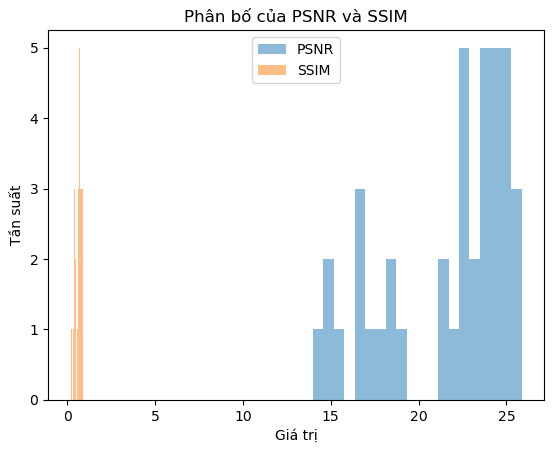

In [18]:
import matplotlib.pyplot as plt

plt.hist(results_df['PSNR'], bins=20, alpha=0.5, label='PSNR')
plt.hist(results_df['SSIM'], bins=20, alpha=0.5, label='SSIM')
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.legend()
plt.title("Phân bố của PSNR và SSIM")
plt.show()

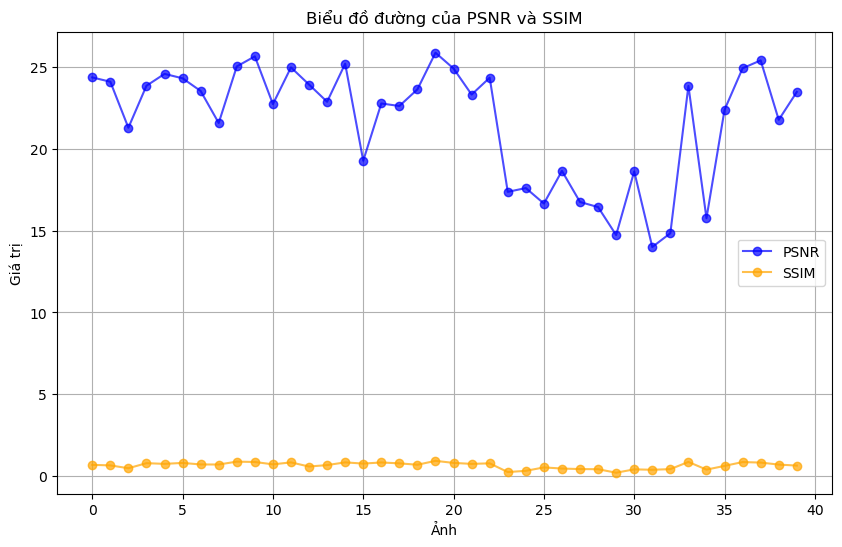

In [25]:
import matplotlib.pyplot as plt

# Kiểm tra nếu DataFrame có dữ liệu
if 'PSNR' in results_df.columns and 'SSIM' in results_df.columns:
    plt.figure(figsize=(10, 6))  # Đặt kích thước cho biểu đồ
    
    # Vẽ biểu đồ đường cho PSNR
    plt.plot(results_df['PSNR'], label='PSNR', color='blue', marker='o', alpha=0.7)
    
    # Vẽ biểu đồ đường cho SSIM
    plt.plot(results_df['SSIM'], label='SSIM', color='orange', marker='o', alpha=0.7)
    
    plt.xlabel("Ảnh")  # Bạn có thể thay đổi nhãn này tùy vào ngữ cảnh
    plt.ylabel("Giá trị")
    plt.legend()
    plt.title("Biểu đồ đường của PSNR và SSIM")
    plt.grid(True)  # Thêm lưới cho dễ nhìn
    plt.show()
else:
    print("DataFrame không chứa cột PSNR hoặc SSIM.")


In [19]:
print("PSNR trung bình:", results_df['PSNR'].mean())
print("SSIM trung bình:", results_df['SSIM'].mean())
print("PSNR độ lệch chuẩn:", results_df['PSNR'].std())
print("SSIM độ lệch chuẩn:", results_df['SSIM'].std())
print("PSNR cao nhất:", results_df['PSNR'].max())
print("SSIM cao nhất:", results_df['SSIM'].max())


PSNR trung bình: 21.693242409592855
SSIM trung bình: 0.6500551569093292
PSNR độ lệch chuẩn: 3.5679994818150154
SSIM độ lệch chuẩn: 0.19270078453235018
PSNR cao nhất: 25.866302201002483
SSIM cao nhất: 0.9299035815268085


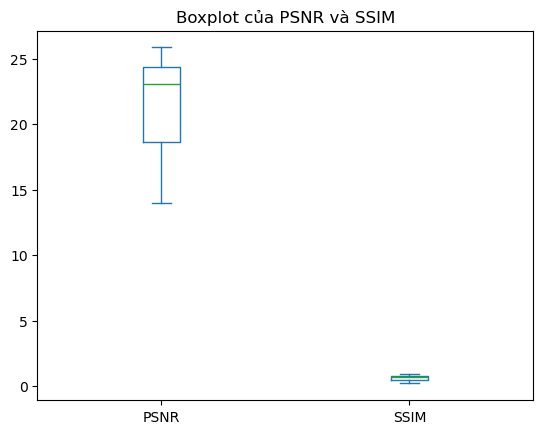

In [20]:
results_df[['PSNR', 'SSIM']].plot(kind='box')
plt.title("Boxplot của PSNR và SSIM")
plt.show()


In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Đặt kích thước cho biểu đồ
    
    # Vẽ biểu đồ đường cho PSNR
    plt.plot(results_df['PSNR'], label='PSNR', color='blue', marker='o', alpha=0.7)
    
    # Vẽ biểu đồ đường cho SSIM
    plt.plot(results_df['SSIM'], label='SSIM', color='orange', marker='o', alpha=0.7)
    
    plt.xlabel("Chỉ số ảnh")  # Bạn có thể thay đổi nhãn này tùy vào ngữ cảnh
    plt.ylabel("Giá trị")
    plt.legend()
    plt.title("Biểu đồ đường của PSNR và SSIM")
    plt.grid(True)  # Thêm lưới cho dễ nhìn
    plt.show()

IndentationError: unexpected indent (3218802926.py, line 5)